# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

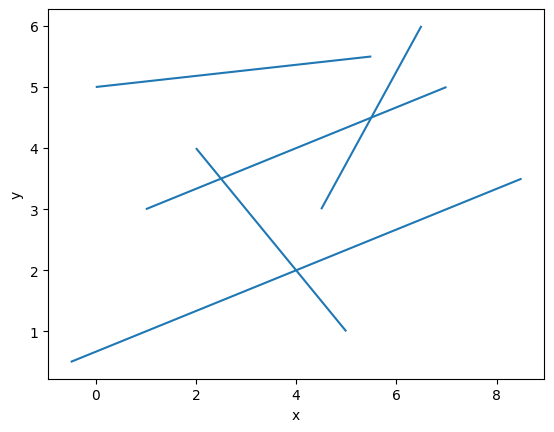

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

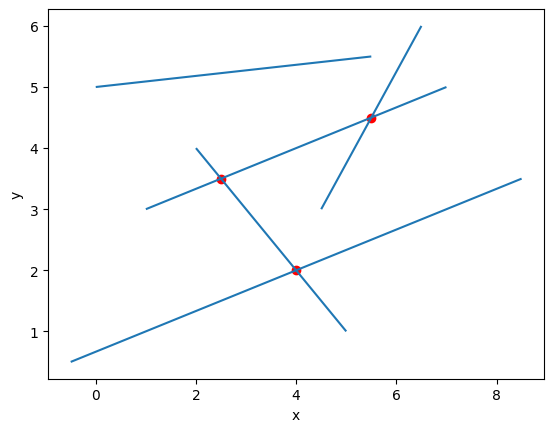

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """

    # prawd że się powtórzą jest 0
    while True:
        x1 = np.float64(np.random.uniform(low=0, high=max_x, size=n))
        x2 = np.float64(np.random.uniform(low=0, high=max_x, size=n))
        if all(x1 != x2):
            break
    y1 = np.float64(np.random.uniform(low=0, high=max_y, size=n))
    y2 = np.float64(np.random.uniform(low=0, high=max_y, size=n))
    p1 = list(zip(x1, y1))
    p2 = list(zip(x2, y2))
    
    return list(zip(p1, p2))

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.395s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
pps = generate_uniform_sections(1001, 1001, 20)

Zwizualizuj otrzymane odcinki

In [6]:
def draw_segments(segments):
    vis = Visualizer()
    vis.add_line_segment(segments)
    vis.show()

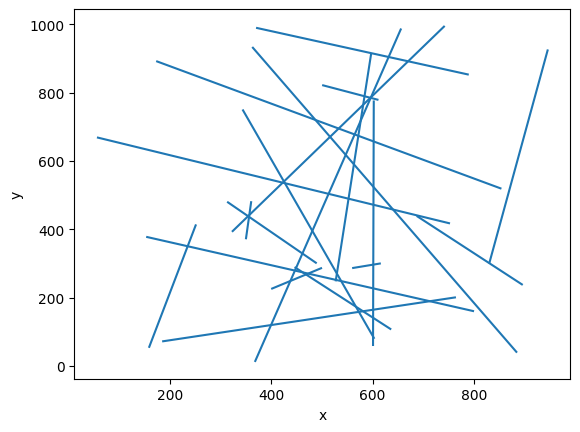

In [9]:
draw_segments(pps)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [10]:
# def add_sections(sections):

In [120]:
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.widgets as mwdg

from matplotlib.backend_bases import MouseEvent
from matplotlib.patches import Polygon
from matplotlib.figure import Figure
from matplotlib.axes import Axes

from numbers import Real

Point = tuple[Real, Real]
Segment = tuple[Point, Point]

BLUE = u'#1f77b4'


class Callback:
    def __init__(self, ax):
        self.added_points = []
        self.ax = ax

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        new_point = (event.xdata, event.ydata)
        self.added_points.append(new_point)
        self.draw(autoscaling=False)

    def draw_points(self):
        if not self.added_points:
            return
        self.ax.scatter(*zip(*(np.array(self.added_points))))

    def draw_lines(self):
        n = 2 * (len(self.added_points) // 2)
        for i in range(0, n, 2):
            self.ax.plot([self.added_points[i][0], self.added_points[i+1][0]],
                         [self.added_points[i][1], self.added_points[i+1][1]], color=BLUE)
    
    def draw(self, autoscaling=True):
        if not autoscaling:
            xlim = self.ax.get_xlim()
            ylim = self.ax.get_ylim()
        self.ax.clear()
        self.draw_points()
        self.draw_lines()
        self.ax.autoscale(autoscaling)
        if not autoscaling:
            self.ax.set_xlim(xlim)
            self.ax.set_ylim(ylim)
        plt.draw()


class InputVisualizer(Visualizer):
    def __init__(self):
        super().__init__()
        self.callback = None
        self.fig: Figure | None = None
        self.ax: Axes | None = None
    
    def get_added_segments(self) -> list[Segment]:
        plt.close()
        T = []
        n = 2 * (len(self.callback.added_points) // 2)
        for i in range(0, n, 2):
            T.append((self.callback.added_points[i], self.callback.added_points[i+1]))
        return T

    def input(self):
        plt.close()
        self.fig = plt.figure()
        self.ax = plt.axes(autoscale_on=False)
        self.callback = Callback(self.ax)
        self.fig.canvas.mpl_connect('button_press_event', self.callback.on_click)
        self.callback.draw()
        # plt.show()

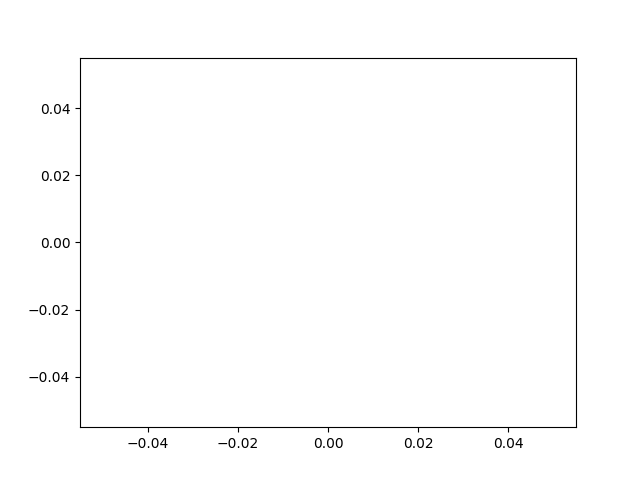

In [121]:
%matplotlib widget
vis = InputVisualizer()
vis.input()

In [122]:
segments = vis.get_added_segments()

Uzupełnij funkcję ```is_intersection```

In [19]:
import numpy as np
import bisect

from abc import ABC, abstractmethod
from enum import Enum, auto
from dataclasses import dataclass
from numbers import Real

Point = tuple[Real, Real]
Segment = tuple[Point, Point]

X = 0
Y = 1


@dataclass
class Event:
    __slots__ = ("point", "segments", "type")
    __match_args__ = ("point", "segments", "type")

    class Type(Enum):
        START = auto()
        INTERSECTION = auto()
        END = auto()

    point: Point
    segments: Segment | tuple[Segment, Segment]
    type: Type


class EventQueueABC(ABC):
    @classmethod
    @abstractmethod
    def from_segments(cls, segments: list[Segment]) -> 'EventQueueABC':
        pass

    @abstractmethod
    def empty(self) -> bool:
        pass

    @abstractmethod
    def pop(self) -> Event:
        pass

    @abstractmethod
    def add_intersection(self, s1: Segment, s2: Segment, sweep_x: Real) -> None:
        pass

    @abstractmethod
    def idx(self, segment: Segment) -> int:
        pass

class EventQueueList(EventQueueABC):
    def __init__(self):
        self._tree: list[Event] = []
        self._segment_to_idx: dict[Segment, int] = {}
        self._visited_intersections: set[tuple[int, int]] = set()

    @classmethod
    def from_segments(cls, segments: list[Segment]) -> 'EventQueueList':
        q = cls()
        q._segment_to_idx = {s: i for i, s in enumerate(segments)}

        for s in segments:
            p1, p2 = s
            if p1[X] > p2[X]:
                p1, p2 = p2, p1
            start = Event(p1, s, Event.Type.START)
            end = Event(p2, s, Event.Type.END)
            q.add(start)
            q.add(end)

        return q

    def empty(self) -> bool:
        return len(self._tree) == 0

    def pop(self) -> Event:
        event = min(self._tree, key=lambda e: e.point)
        self._tree.remove(event)
        return event

    def add(self, event: Event) -> None:
        self._tree.append(event)
    
    def get_normalized_pair(self, segment1: Segment, segment2: Segment) -> tuple[int, int]:
        idx1 = self._segment_to_idx[segment1]
        idx2 = self._segment_to_idx[segment2]
        idx1, idx2 = sorted((idx1, idx2))
        return idx1, idx2

    def is_duplicate(self, segment1: Segment, segment2: Segment) -> bool:
        normalized_pair = self.get_normalized_pair(segment1, segment2)
        return normalized_pair in self._visited_intersections

    def mark_for_duplication(self, segment1: Segment, segment2: Segment) -> None:
        normalized_pair = self.get_normalized_pair(segment1, segment2)
        self._visited_intersections.add(normalized_pair)
    
    def intersection_event(self, s1: Segment | None, s2: Segment | None, sweep_x: Real) -> Event | None:
        if s1 is None or s2 is None:
            return None
        if self.is_duplicate(s1, s2):
            return None
        self.mark_for_duplication(s1, s2)
        point = intersection_point(s1, s2)
        if point is None:
            return None
        if point[X] < sweep_x:
            return None
        return Event(point, (s1, s2), Event.Type.INTERSECTION)

    def add_intersection(self, s1: Segment | None, s2: Segment | None, sweep_x: Real) -> None:
        event = self.intersection_event(s1, s2, sweep_x)
        if event is None:
            return
        self.add(event)
    
    def idx(self, segment: Segment) -> int:
        return self._segment_to_idx[segment]

class SweepStateABC(ABC):
    @abstractmethod
    def add(self, segment: Segment, sweep_x: Real) -> None:
        pass

    @abstractmethod
    def next(self, segment: Segment) -> Segment | None:
        pass

    @abstractmethod
    def prev(self, segment: Segment) -> Segment | None:
        pass

    @abstractmethod
    def remove(self, segment: Segment) -> None:
        pass

    @abstractmethod
    def swap(self, s1: Segment, s2: Segment) -> None:
        pass


class SweepStateList(SweepStateABC):
    def __init__(self):
        self._tree: list[Segment] = []

    @staticmethod
    def calculate_sweep_intersection(s: Segment, sweep_x: Real) -> Point:
        t = (sweep_x - s[0][X]) / (s[1][X] - s[0][X])
        return linterp(t, s[0], s[1])

    def add(self, segment: Segment, sweep_x: Real) -> None:
        bisect.insort(self._tree, segment, key=lambda s: self.calculate_sweep_intersection(s, sweep_x)[Y])

    def find(self, segment: Segment) -> int | None:
        for i in range(len(self._tree)):
            if self._tree[i] == segment:
                return i
        return None

    def next(self, segment: Segment) -> Segment | None:
        idx = self.find(segment)
        if idx is None:
            return None
        if idx == len(self._tree) - 1:
            return None
        return self._tree[idx + 1]

    def prev(self, segment: Segment) -> Segment | None:
        idx = self.find(segment)
        if idx is None:
            return None
        if idx == 0:
            return None
        return self._tree[idx - 1]

    def remove(self, segment: Segment) -> None:
        self._tree.remove(segment)

    def swap(self, s1: Segment, s2: Segment) -> None:
        idx1 = self.find(s1)
        idx2 = self.find(s2)
        self._tree[idx1], self._tree[idx2] = self._tree[idx2], self._tree[idx1]


def linterp(t: Real, a: Point, b: Point) -> Point:
    return (1 - t) * a[X] + t * b[X], (1 - t) * a[Y] + t * b[Y]


def intersection_point(s1, s2, eps=1e-10):
    a, b = s1
    c, d = s2
    w = np.linalg.det([[b[X] - a[X], c[X] - d[X]],
                       [b[Y] - a[Y], c[Y] - d[Y]]])
    if -eps <= w <= eps:
        return None
    wt = np.linalg.det([[c[X] - a[X], c[X] - d[X]],
                        [c[Y] - a[Y], c[Y] - d[Y]]])
    t = wt / w
    if not 0 <= t <= 1:
        return None

    wr = np.linalg.det([[b[X] - a[X], c[X] - a[X]],
                        [b[Y] - a[Y], c[Y] - a[Y]]])
    r = wr / w
    if not 0 <= r <= 1:
        return None

    return linterp(t, a, b)

In [20]:
def is_intersection(sections: list[Segment], eps=1e-10):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    T = SweepStateList()
    Q = EventQueueList.from_segments(sections)

    while not Q.empty():
        event = Q.pop()
        match event:
            case Event(point, segment, type=Event.Type.START):
                T.add(segment, sweep_x=point[X])
                s1 = T.next(segment)
                s2 = T.prev(segment)
                Q.add_intersection(segment, s1, sweep_x=point[X])
                Q.add_intersection(s2, segment, sweep_x=point[X])
            case Event(point, segment, type=Event.Type.END):
                s1 = T.prev(segment)
                s2 = T.next(segment)
                T.remove(segment)
                Q.add_intersection(s1, s2, sweep_x=point[X])
            case Event(point, (segment_low, segment_high), type=Event.Type.INTERSECTION):
                return True
            case _:
                assert False, "Illegal case"
    return False

In [21]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.017s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [104]:
BLUE = u'#1f77b4'
ORANGE = u'#ff7f0e'

def is_intersection_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    T = SweepStateList()
    Q = EventQueueList.from_segments(sections)
    ymin = min([p for s in sections for p in s], key=lambda s: s[1])[1]
    ymax = max([p for s in sections for p in s], key=lambda s: s[1])[1]
    sweep = None
    eventpoint = None
    vis = Visualizer()
    vis.add_line_segment(sections)
    Tsegments = {}
    # Visualizer
    while not Q.empty():
        event = Q.pop()
        # Visualizer point
        if eventpoint:
            vis.remove_figure(eventpoint)
        eventpoint = vis.add_point(event.point, color=BLUE)
        if sweep:
            vis.remove_figure(sweep)
        # print(((event.point[0], ymin), (event.point[0], ymax)))
        sweep = vis.add_line_segment(((event.point[0], ymin), (event.point[0], ymax)), color='black')
        
        match event:
            case Event(point, segment, type=Event.Type.START):
                # Visualizer segment
                Tsegments[segment] = vis.add_line_segment(segment, color='purple')
                T.add(segment, sweep_x=point[X])
                s1 = T.next(segment)
                s2 = T.prev(segment)
                # Visualizer s1
                if s1:
                    line = vis.add_line_segment(segment, color=ORANGE)
                    l1 = vis.add_line_segment(s1, color=ORANGE)
                event1 = Q.intersection_event(segment, s1, sweep_x=point[X])
                if event1 is not None:
                    # Visaulizer e1.point
                    vis.add_point(event1.point, color=BLUE)
                    Q.add(event1)
                    return True, vis
                # Visualizer usuń s1
                if s1:
                    vis.remove_figure(l1)
                    vis.remove_figure(line)
                # Visualizer s2
                if s2:
                    line = vis.add_line_segment(segment, color=ORANGE)
                    l2 = vis.add_line_segment(s2, color=ORANGE)
                event2 = Q.intersection_event(s2, segment, sweep_x=point[X])
                if event2 is not None:
                    # Visaulizer e2.point
                    vis.add_point(event2.point, color=BLUE)
                    Q.add(event2)
                    return True, vis
                # Visualizer usuń s2
                if s2:
                    vis.remove_figure(l2)
                    vis.remove_figure(line)
            case Event(point, segment, type=Event.Type.END):
                s1 = T.prev(segment)
                s2 = T.next(segment)
                T.remove(segment)
                vis.remove_figure(Tsegments[segment])
                if s1 and s2:
                    l1 = vis.add_line_segment(s1, color=ORANGE)
                    l2 = vis.add_line_segment(s2, color=ORANGE)
                event = Q.intersection_event(s1, s2, sweep_x=point[X])
                if event is not None:
                    # Visaulizer e1.point
                    vis.add_point(event.point, color=BLUE)
                    Q.add(event)
                    return True, vis
                if s1 and s2:
                    vis.remove_figure(l1)
                    vis.remove_figure(l2)
            case Event(point, (segment_low, segment_high), type=Event.Type.INTERSECTION):
                return True, vis
            case _:
                assert False, "Illegal case"
    return False, vis

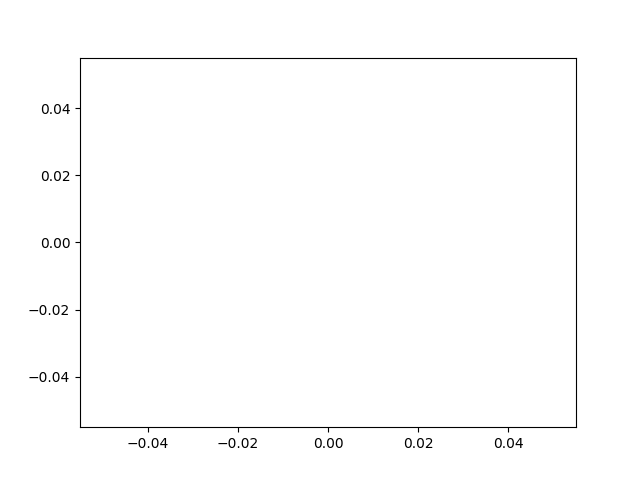

In [113]:
%matplotlib widget
vis = InputVisualizer()
vis.input()

In [114]:
segments = vis.get_added_segments()

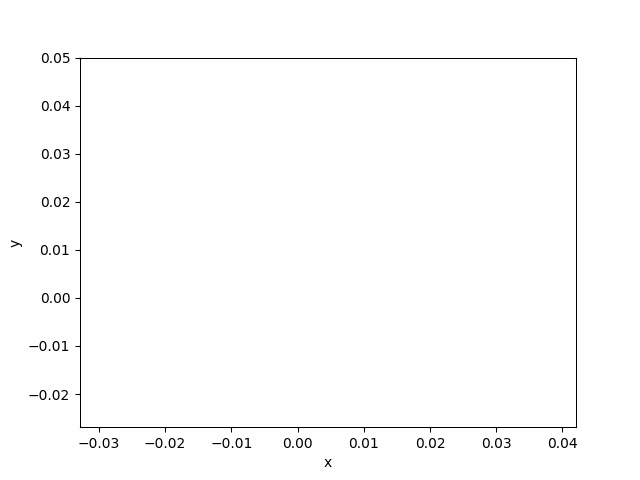

In [105]:
is_intersection_with_visualization(segments)[1].show_gif(interval=200)

Uzupełnij funkcję ```find_intersections```

In [22]:
def find_intersections(sections, eps=1e-10):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    T = SweepStateList()
    Q = EventQueueList.from_segments(sections)
    S = []

    while not Q.empty():
        event = Q.pop()
        match event:
            case Event(point, segment, type=Event.Type.START):
                T.add(segment, sweep_x=point[X])
                s1 = T.next(segment)
                s2 = T.prev(segment)
                Q.add_intersection(segment, s1, sweep_x=point[X])
                Q.add_intersection(s2, segment, sweep_x=point[X])
            case Event(point, segment, type=Event.Type.END):
                s1 = T.prev(segment)
                s2 = T.next(segment)
                T.remove(segment)
                Q.add_intersection(s1, s2, sweep_x=point[X])
            case Event(point, (segment_low, segment_high), type=Event.Type.INTERSECTION):
                S.append((point, Q.idx(segment_low) + 1, Q.idx(segment_high) + 1))
                s_low = T.prev(segment_low)
                s_high = T.next(segment_high)
                T.swap(segment_low, segment_high)
                Q.add_intersection(segment_low, s_high, sweep_x=point[X])
                Q.add_intersection(s_low, segment_high, sweep_x=point[X])
            case _:
                assert False, "Illegal case"
    return S

In [23]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.016s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [118]:
def find_intersections_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    T = SweepStateList()
    Q = EventQueueList.from_segments(sections)
    S = []
    ymin = min([p for s in sections for p in s], key=lambda s: s[1])[1]
    ymax = max([p for s in sections for p in s], key=lambda s: s[1])[1]
    sweep = None
    eventpoint = None
    vis = Visualizer()
    vis.add_line_segment(sections)
    Tsegments = {}
    # Visualizer
    while not Q.empty():
        event = Q.pop()
        # Visualizer point
        if eventpoint:
            vis.remove_figure(eventpoint)
        eventpoint = vis.add_point(event.point, color=BLUE)
        if sweep:
            vis.remove_figure(sweep)
        # print(((event.point[0], ymin), (event.point[0], ymax)))
        sweep = vis.add_line_segment(((event.point[0], ymin), (event.point[0], ymax)), color='black')
        
        match event:
            case Event(point, segment, type=Event.Type.START):
                # Visualizer segment
                Tsegments[segment] = vis.add_line_segment(segment, color='purple')
                T.add(segment, sweep_x=point[X])
                s1 = T.next(segment)
                s2 = T.prev(segment)
                # Visualizer s1
                if s1:
                    line = vis.add_line_segment(segment, color=ORANGE)
                    l1 = vis.add_line_segment(s1, color=ORANGE)
                event1 = Q.intersection_event(segment, s1, sweep_x=point[X])
                if event1 is not None:
                    # Visaulizer e1.point
                    vis.add_point(event1.point, color=ORANGE)
                    Q.add(event1)
                # Visualizer usuń s1
                if s1:
                    vis.remove_figure(l1)
                    vis.remove_figure(line)
                # Visualizer s2
                if s2:
                    line = vis.add_line_segment(segment, color=ORANGE)
                    l2 = vis.add_line_segment(s2, color=ORANGE)
                event2 = Q.intersection_event(s2, segment, sweep_x=point[X])
                if event2 is not None:
                    # Visaulizer e2.point
                    vis.add_point(event2.point, color=ORANGE)
                    Q.add(event2)
                # Visualizer usuń s2
                if s2:
                    vis.remove_figure(l2)
                    vis.remove_figure(line)
            case Event(point, segment, type=Event.Type.END):
                s1 = T.prev(segment)
                s2 = T.next(segment)
                T.remove(segment)
                vis.remove_figure(Tsegments[segment])
                if s1 and s2:
                    l1 = vis.add_line_segment(s1, color=ORANGE)
                    l2 = vis.add_line_segment(s2, color=ORANGE)
                event = Q.intersection_event(s1, s2, sweep_x=point[X])
                if event is not None:
                    # Visaulizer e1.point
                    vis.add_point(event.point, color=ORANGE)
                    Q.add(event)
                if s1 and s2:
                    vis.remove_figure(l1)
                    vis.remove_figure(l2)
            case Event(point, (segment_low, segment_high), type=Event.Type.INTERSECTION):
                S.append((point, Q.idx(segment_low) + 1, Q.idx(segment_high) + 1))
                s_low = T.prev(segment_low)
                s_high = T.next(segment_high)
                T.swap(segment_low, segment_high)

                if s_high:
                    line = vis.add_line_segment(segment_low, color=ORANGE)
                    l1 = vis.add_line_segment(s_high, color=ORANGE)
                event1 = Q.intersection_event(segment_low, s_high, sweep_x=point[X])
                if event1 is not None:
                    # Visaulizer e1.point
                    vis.add_point(event1.point, color=ORANGE)
                    Q.add(event1)
                if s_high:
                    vis.remove_figure(l1)
                    vis.remove_figure(line)
                event2 = Q.intersection_event(s_low, segment_high, sweep_x=point[X])

                if s_low:
                    line = vis.add_line_segment(segment_high, color=ORANGE)
                    l2 = vis.add_line_segment(s_low, color=ORANGE)
                if event2 is not None:
                    # Visaulizer e1.point
                    vis.add_point(event2.point, color=ORANGE)
                    Q.add(event2)
                if s_low:
                    vis.remove_figure(l2)
                    vis.remove_figure(line)
            case _:
                assert False, "Illegal case"
    return S, vis

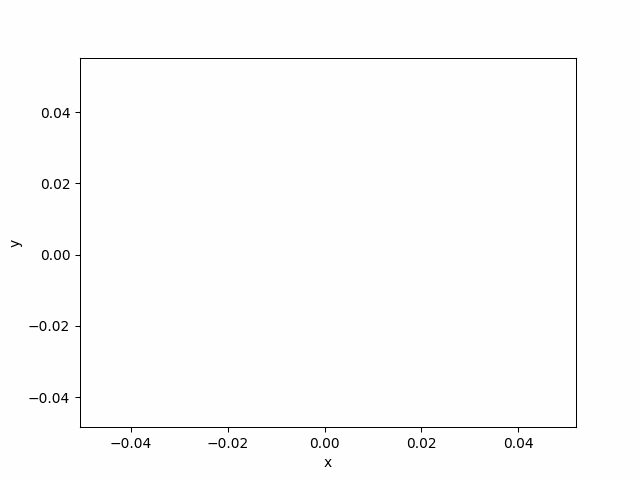

In [123]:
find_intersections_with_visualization(segments)[1].show_gif(interval=200)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here